# Homework 5
# Ethan Gallup
# Unid: u1033198

#### Imports \& set up

In [61]:
import numpy as np
from numpy import interp
from numpy import polyfit, polyval
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
plt.rcParams['axes.grid'] = True

# Problem 1

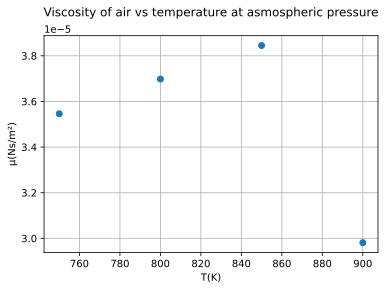

In [65]:
T = np.array([750, 800, 850, 900])
μ = np.array([3.546, 3.698, 3.845, 2.981]) * 10**(-5)
plt.ylabel('\u03BC(Ns/m\u00B2)')
plt.xlabel('T(K)')
plt.title('Viscosity of air vs temperature at asmospheric pressure\n')
plt.plot(T, μ, 'o')

### 1. Linear Interpolation

#### a) If you were to use Linear interpolation to estimate $\mu$ at 835 K, list the two data pairs that you would use to do the interpolation. The pairs should be listed in the form $(T_1,\mu_1)$ and $(T_2,\mu_2)$,

$(800, 3.698\times 10^{-5})$

$(850, 3.843\times 10^{-5})$

I chose the pairs on either side of the data-point we wish to estimate.

#### b) Using these two points, estimate $\mu$ at 835 K (by hand).

$$
\mu = \mu_1 + \frac{\mu_2-\mu_1}{T_2-T_1}\left(T-T_1\right)
$$

$$
\mu = 3.698\times 10^{-5} + \frac{3.843\times 10^{-5}-3.698\times 10^{-5}}{850-800}\left(835-800\right)
$$


$$
\mu = 3.800\times 10^{-5}
$$

### 2. Quadratic Interpolation

#### a)  If you were to use a quadratic interpolant $(\mu = a_2 T^2+a_1 T +a_0)$, explain why you need three data pairs $(T_1, \mu_1)$, $(T_2, \mu_2)$, and $(T_3, \mu_3)$ to interpolate the data?

Since you have 3 unknowns, $a_0$, $a_1$ and $a_2$, you need three equations to solve for those unknowns. The three data points provide the right hand side and the coefficient matrix that make up this system of three equations.

#### b)  Derive the system of equations that you must solve to obtain the polynomial coefficients for this quadratic interpolant. Keep your solution in terms of $(T_1, \mu_1)$, $(T_2, \mu_2)$, and $(T_3, \mu_3)$, i.e. do NOT substitute any particular values of T or $\mu$. Then write the equations in Matrix form.

$$
\begin{matrix}
a_0+a_1 T_1+a_2 T_1^2 = \mu_1\\
a_0+a_1 T_2+a_2 T_2^2 = \mu_2\\
a_0+a_1 T_3+a_2 T_3^2 = \mu_3\\
\end{matrix}
$$

$$
\begin{bmatrix}
1 & T_1 & T_1^2\\
1 & T_2 & T_2^2\\
1 & T_3 & T_3^2\\
\end{bmatrix}
\begin{pmatrix}
a_0\\
a_1\\
a_2\\
\end{pmatrix} = 
\begin{bmatrix}
\mu_0\\
\mu_1\\
\mu_2\\
\end{bmatrix} 
$$

#### c) Which three data pairs that you would choose to do the interpolation if you were to estimate $\mu$ at T = 835 K? Justify your answer. The pairs should be listed in the form $(T_1, \mu_1)$, $(T_2, \mu_2)$, and $(T_3, \mu_3)$.

$(800, 3.698\times 10^{-5})$

$(850, 3.843\times 10^{-5})$

$(900, 2.981\times 10^{-5})$

I chose the two nearest points on either side of the point we need to estimate and the point that would most likely follow a parabolic trend.

# Problem 2

Text(0.5, 1.0, 'Temperature vs time of day')

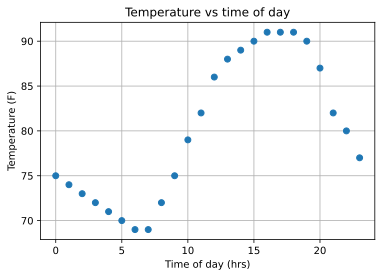

In [19]:
t = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]  # hrs
Temp = [75,74,73,72,71,70,69,69,72,75,79,82,86,88,89,90,91,91,91,90,87,82,80,77]  # F
plt.plot(t, Temp, 'o')
plt.xlabel('Time of day (hrs)')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs time of day')

### 1.  In this question, you will use linear interpolation to deal with this dataset. Answer the following questions:

#### a) Using Python, find the temperature at t = 22.5 hrs.

In [76]:
linestimate = interp(22.5, t, Temp)
print(f'Temp \u2248 {linestimate}\u0366 F')

Temp ≈ 78.5ͦ F


#### b) Create an interpolant on the interval t = [0,23] using 100 points. (use linspace to generate the points on the interval).

In [24]:
x = np.linspace(0, 23, 100)
Tlin = interp(x, t, Temp)

#### c)  Plot this linearly interpolated data alongside the original dataset on the same plot. Make sure you label the x and y axes.

Text(17.75, 77.75, '(22.5, 78.5)')

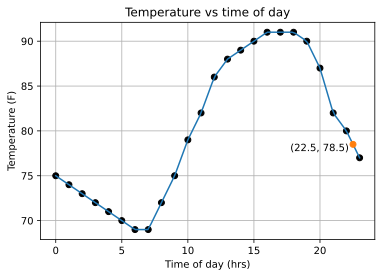

In [88]:
plt.plot(t, Temp, 'ko')
plt.plot(x, Tlin)
plt.plot(22.5, linestimate, 'o')
plt.xlabel('Time of day (hrs)')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs time of day')
plt.text(17.75, 77.75, f'(22.5, {linestimate})')

### 2.   In this question, you will use polynomial interpolation to deal with this dataset. Answer the following questions:

#### a) What is the order or degree of the polynomial that you can fit this entire dataset to? Note that the input data has 24 entries in it.

n = 24

degree = n-1 = 23

We can fit a 23rd degree polynomial to this dataset.

#### b)  Using this polynomial order/degree, create a polynomial fit for the entire dataset and use that to find the temperature at t = 22.5 hrs. Comment on your result.

In [71]:
coefs = polyfit(t, Temp, len(t)-1)
estimate = polyval(coefs, [22.5])[0]
print(f'Temp \u2248 {estimate:.2f}\u0366 F')

Temp ≈ 128.73ͦ F


C:\Users\ethan\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


This value makes absolutely no sense. The point is way outside the expected range for the points nearest to it as well as the range of the entire dataset. Something went wrong with the interpolation.

#### c) To help explain your result in 2.b, plot this fit on the interval [0,23] using 100 points and comment on the plot. You should also plot the original data on the same plot for comparison purposes.

Text(0.5, 1.0, 'Temperature vs time of day')

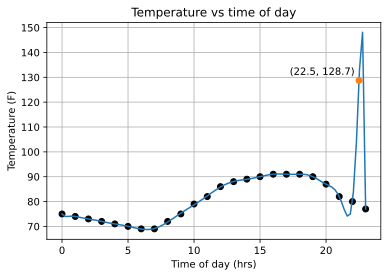

In [64]:
x = np.linspace(0, 23, 100)
Tpoly = polyval(coefs, x)
plt.plot(t, Temp, 'ko')
plt.plot(x, Tpoly)
plt.plot(22.5, estimate, 'o')
plt.text(17.25, 131, f'(22.5, {estimate:.1f})')
plt.xlabel('Time of day (hrs)')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs time of day')


The interpolation ran through all of the points but had to do some crazy oscillations to do so. This resulted in extreme deviation from the general trend of the data and caused the unexpected result in part b.